In [ ]:
#THIS SCRIPT WILL MAKE INTEGRATED SEURAT OBJECT WITH STANDARD WORKFLOW, WITHOUT PROTOPLAST INDUCED 
#GENES, OR MITO/CP GENES IN THE VARIABLE FEATURE LIST. ALSO TAKE OUT LOW QUALITY GENES (THOSE WITH MT > 10%), AND PUTATIVE
#DOUBLETS.
#THIS INTEGRATES WT AND MUTANT

In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
if (!requireNamespace("here", quietly = TRUE))
    install.packages("here")
if (!requireNamespace("ggplot2", quietly = TRUE))
    install.packages("ggplot2")
if (!requireNamespace("ggpointdensity", quietly = TRUE))
    install.packages("ggpointdensity")
if (!requireNamespace("DropletUtils", quietly = TRUE)) 
    BiocManager::install("DropletUtils")
if (!requireNamespace("BUSpaRse", quietly = TRUE)) 
    BiocManager::install("BUSpaRse")
if (!requireNamespace("scico", quietly = TRUE))
    install.packages("scico")
if (!requireNamespace("reticulate", quietly = TRUE))
    install.packages("reticulate")
if (!requireNamespace("future", quietly = TRUE))
    install.packages("future")
if (!requireNamespace("DoubletFinder", quietly = TRUE))
    remotes::install_github('chris-mcginnis-ucsf/DoubletFinder')
if (!requireNamespace("tidyverse", quietly = TRUE))
    install.packages("tidyverse")
#devtools::install_github(repo = 'satijalab/seurat', ref = 'develop')
# if (!requireNamespace("COPILOT", quietly = TRUE))
#     devtools::install_github('Hsu-Che-Wei/COPILOT')

In [ ]:
library(BUSpaRse)
library(here)
library(Matrix)
library(tidyverse)
library(Seurat)
library(ggpointdensity)
library(scico)
library(scales)
library(DropletUtils)
library(reticulate)
library(repr)
library(DoubletFinder)
library(future)
library(RColorBrewer)
options(future.globals.maxSize = 100000 * 1024^2)

proto_genes=read.csv("../data/bulk_data/protoplasting.csv")
proto_list=as.character(proto_genes[abs(proto_genes$logFC) > 4,]$genes)

In [25]:
# THIS IS THE PREPROCESSING TO GET TO THE INTEGRATED SEURAT OBJECT. JUST UNCOMMENT ENTIRE CELL.

wt_1_seu = readRDS(file = "../data/seurat_objects/seurat_raw_3_11_21/sc_26_combined.rds")
wt_2_seu = readRDS(file = "../data/seurat_objects/seurat_raw_3_11_21/sc_67.rds")
mut_1_seu = readRDS(file = "../data/seurat_objects/seurat_raw_3_11_21/sc_27_combined.rds")
mut_2_seu = readRDS(file = "../data/seurat_objects/seurat_raw_3_11_21/sc_68.rds")

In [28]:
dim(wt_1_seu@meta.data)
dim(wt_2_seu@meta.data)
dim(mut_1_seu@meta.data)
dim(mut_2_seu@meta.data)

[1] 7509   11

[1] 7571   11

[1] 14492    11

[1] 7578   11

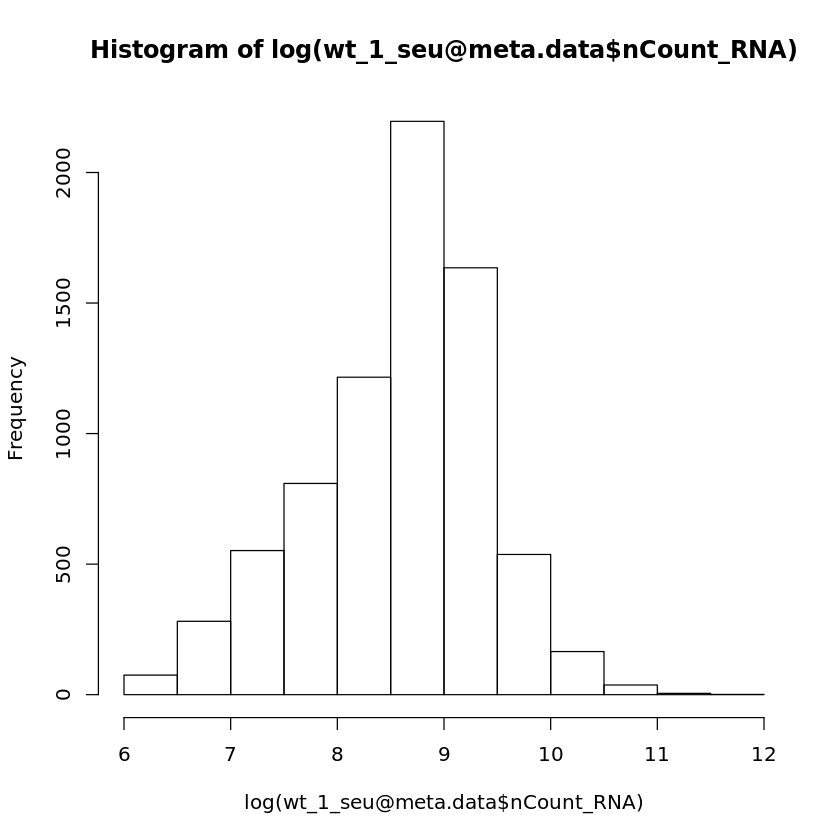

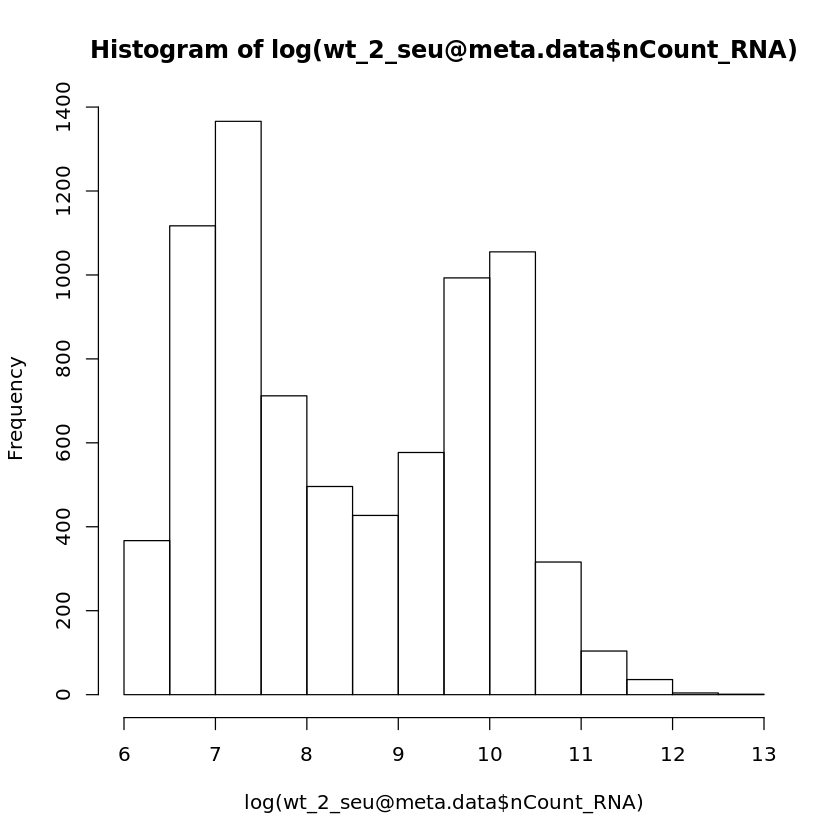

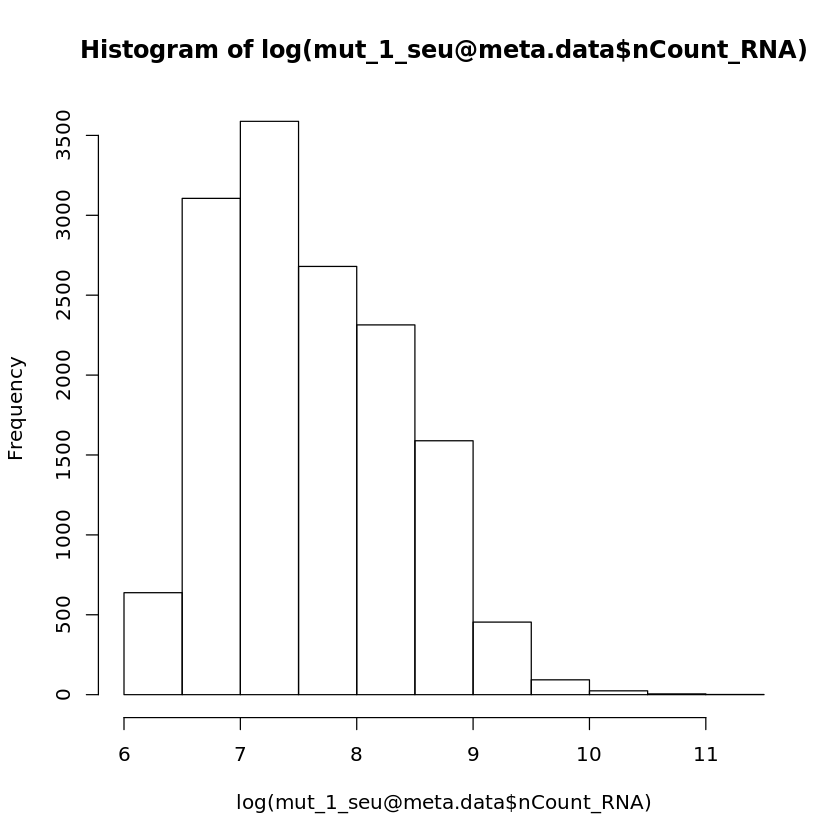

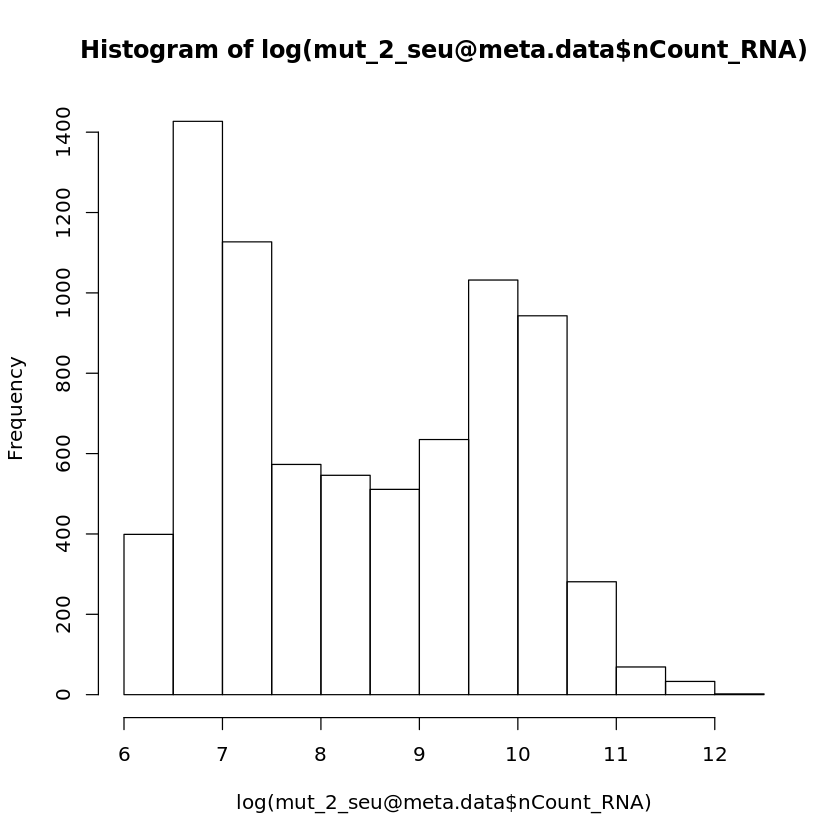

In [31]:
hist(log(wt_1_seu@meta.data$nCount_RNA))
hist(log(wt_2_seu@meta.data$nCount_RNA))
hist(log(mut_1_seu@meta.data$nCount_RNA))
hist(log(mut_2_seu@meta.data$nCount_RNA))

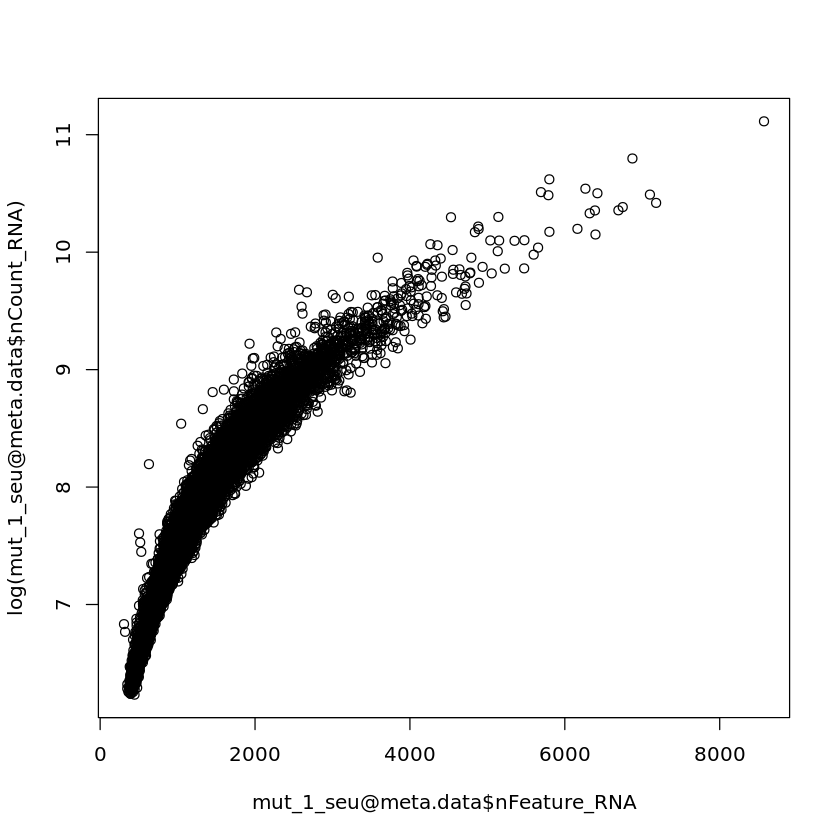

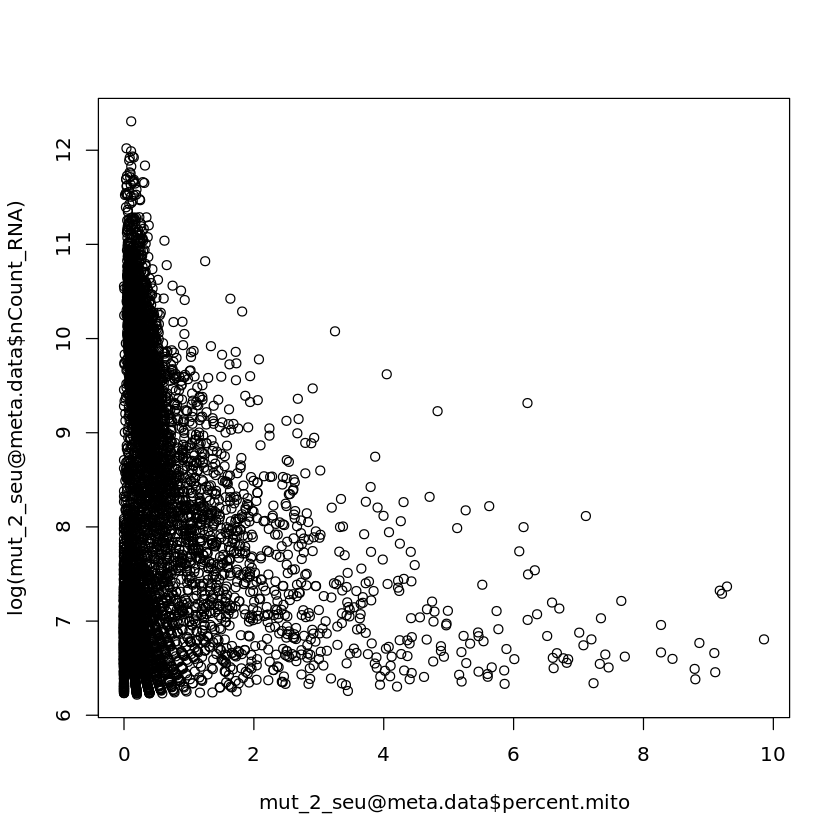

In [41]:
plot(log(mut_1_seu@meta.data$nCount_RNA) ~ mut_1_seu@meta.data$nFeature_RNA)
plot(log(mut_2_seu@meta.data$nCount_RNA) ~ mut_2_seu@meta.data$percent.mito)

In [39]:
mut_2_seu@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,nCount_spliced,nFeature_spliced,nCount_unspliced,nFeature_unspliced,percent.mito,percent.cp,geno,experiment
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>
AAACCCACAAATCAAG,sc_68,34252,6049,31270,5902,2982,1215,0.1255401,3.1618592,mutant,nonsorted
AAACCCAGTAAGGTCG,sc_68,28409,4986,25911,4859,2498,1015,0.1267204,3.0553698,mutant,nonsorted
AAACCCAGTACGAGCA,sc_68,975,682,936,653,39,35,0.0000000,2.7692308,mutant,nonsorted
AAACCCATCATTACCT,sc_68,16549,3583,15298,3456,1252,676,0.5438395,2.2659979,mutant,nonsorted
AAACCCATCCGTACGG,sc_68,660,489,593,467,67,60,0.6060606,0.4545455,mutant,nonsorted
AAACCCATCGTAGAGG,sc_68,723,500,693,480,30,28,0.2766252,4.5643154,mutant,nonsorted
AAACGAAAGGTAAGGA,sc_68,29137,5123,26643,4987,2495,1006,0.1063939,3.8095892,mutant,nonsorted
AAACGAACAACAGCCC,sc_68,700,524,666,504,34,31,0.1428571,4.2857143,mutant,nonsorted
AAACGAACAATGAGCG,sc_68,865,531,836,511,29,27,0.0000000,0.5780347,mutant,nonsorted


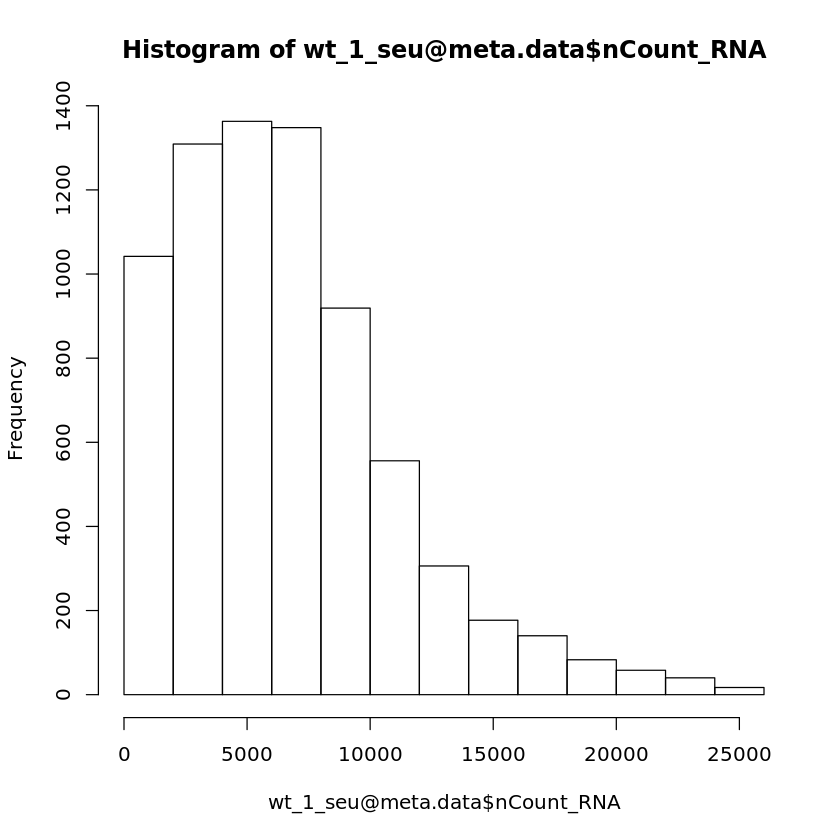

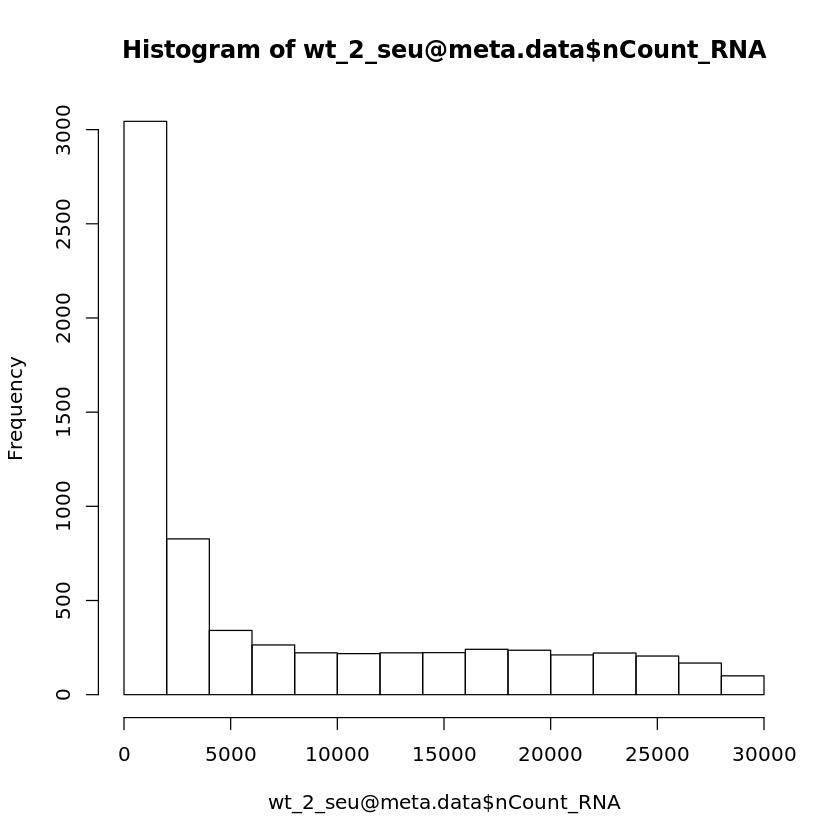

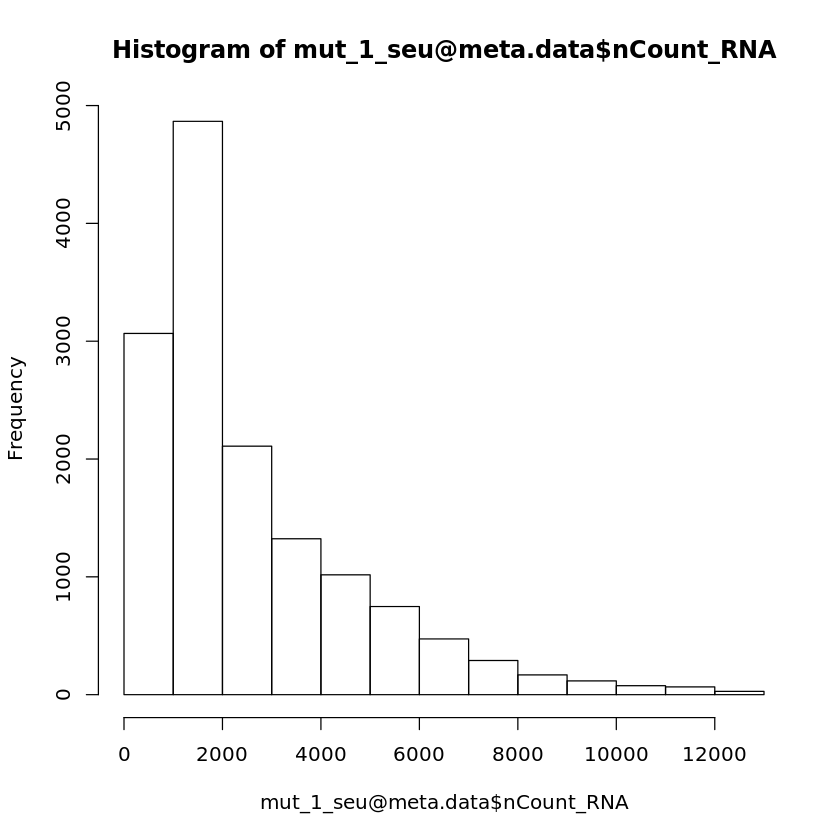

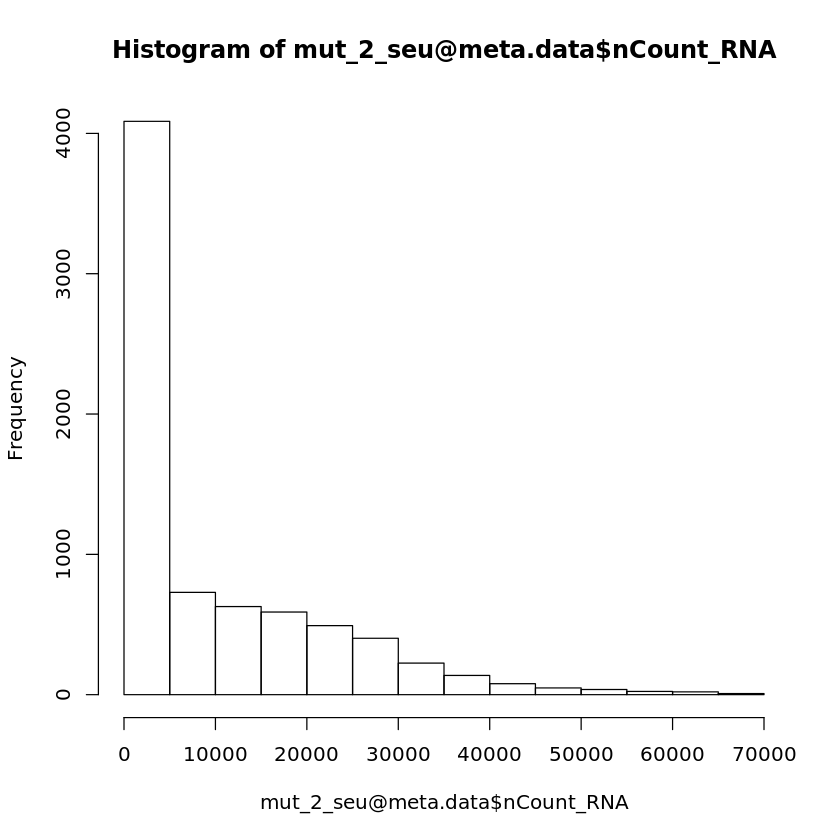

In [24]:
#deal with high mito cells and putative doublets (although removing doublets seemed to remove a ton of abscission zone cells)
thr_low = 500
thr_high_percentile = .99

thr_high =  quantile(wt_1_seu@meta.data$nCount_RNA, .99)
wt_1_seu <- subset(wt_1_seu, subset = percent.mito < 10 & nCount_RNA > thr_low  & nCount_RNA < thr_high) # & wt_1_seu@meta.data[,7] =="Singlet")
dim(wt_1_seu@assays$RNA)

thr_high =  quantile(wt_2_seu@meta.data$nCount_RNA, .99)
wt_2_seu <- subset(wt_2_seu, subset = percent.mito < 10 & nCount_RNA > thr_low  & nCount_RNA < thr_high) # &  wt_2_seu@meta.data[,7] =="Singlet")
dim(wt_2_seu@assays$RNA)

thr_high =  quantile(mut_1_seu@meta.data$nCount_RNA, .99)
mut_1_seu <- subset(mut_1_seu, subset = percent.mito < 10 & nCount_RNA > thr_low  & nCount_RNA < thr_high) # & mut_1_seu@meta.data[,7] =="Singlet")
dim(mut_1_seu@assays$RNA)

thr_high =  quantile(mut_2_seu@meta.data$nCount_RNA, .99)
mut_2_seu <- subset(mut_2_seu, subset = percent.mito < 10 & nCount_RNA > thr_low  & nCount_RNA < thr_high) # & mut_2_seu@meta.data[,7] =="Singlet")
dim(mut_2_seu@assays$RNA)


hist(wt_1_seu@meta.data$nCount_RNA)
hist(wt_2_seu@meta.data$nCount_RNA)
hist(mut_1_seu@meta.data$nCount_RNA)
hist(mut_2_seu@meta.data$nCount_RNA)

In [20]:
#deal with high mito cells and putative doublets (although removing doublets seemed to remove a ton of abscission zone cells)
thr_low = 500
thr_high_percentile = .99

thr_high =  quantile(wt_1_seu@meta.data$nCount_RNA, .99)
wt_1_seu <- subset(wt_1_seu, subset = percent.mito < 10 & nCount_RNA > thr_low  & nCount_RNA < thr_high) # & wt_1_seu@meta.data[,7] =="Singlet")
dim(wt_1_seu@assays$RNA)

thr_high =  quantile(wt_2_seu@meta.data$nCount_RNA, .99)
wt_2_seu <- subset(wt_2_seu, subset = percent.mito < 10 & nCount_RNA > thr_low  & nCount_RNA < thr_high) # &  wt_2_seu@meta.data[,7] =="Singlet")
dim(wt_2_seu@assays$RNA)

thr_high =  quantile(mut_1_seu@meta.data$nCount_RNA, .99)
mut_1_seu <- subset(mut_1_seu, subset = percent.mito < 10 & nCount_RNA > thr_low  & nCount_RNA < thr_high) # & mut_1_seu@meta.data[,7] =="Singlet")
dim(mut_1_seu@assays$RNA)

thr_high =  quantile(mut_2_seu@meta.data$nCount_RNA, .99)
mut_2_seu <- subset(mut_2_seu, subset = percent.mito < 10 & nCount_RNA > thr_low  & nCount_RNA < thr_high) # & mut_2_seu@meta.data[,7] =="Singlet")
dim(mut_2_seu@assays$RNA)


#Perform SCTransform
defaultW <- getOption("warn") 
options(warn = -1) 
wt_1_seu = SCTransform(wt_1_seu, verbose = FALSE, vars.to.regress = c("percent.mito", "percent.cp"))
wt_2_seu = SCTransform(wt_2_seu, verbose = FALSE, vars.to.regress = c("percent.mito", "percent.cp"))
mut_1_seu = SCTransform(mut_1_seu, verbose = FALSE, vars.to.regress = c("percent.mito", "percent.cp"))
mut_2_seu = SCTransform(mut_2_seu, verbose = FALSE, vars.to.regress = c("percent.mito", "percent.cp"))
options(warn = defaultW)

all_intd_sct = seu_integrate(wt_1_seu, wt_2_seu, mut_1_seu, mut_2_seu, filename = "std_intd_all_SCT_mt_removed_minus_protos_mt_cp_3_30_21", nfeatures = 5000)

#all_intd_sct <- ScaleData(all_intd_sct, verbose = FALSE)
all_intd_sct@meta.data$orig.ident = c(rep("WT_1",length(colnames(wt_1_seu@assays$RNA))), rep("WT_2",length(colnames(wt_2_seu@assays$RNA))), rep("MUT_1",length(colnames(mut_1_seu@assays$RNA))), rep("MUT_2",length(colnames(mut_2_seu@assays$RNA))))
all_intd_sct@meta.data$orig.geno = c(rep("WT",length(colnames(wt_1_seu@assays$RNA)) + length(colnames(wt_2_seu@assays$RNA))), rep("MUT",length(colnames(mut_1_seu@assays$RNA)) + length(colnames(mut_2_seu@assays$RNA))))

saveRDS(all_intd_sct, "../data/intd_seu_objects/std_intd_all_SCT_mt_removed_minus_protos_mt_cp_4_5_21.rds")

[1] 22832  7358

[1] 22907  6743

[1] 22735 14347

[1] 22646  7502

In [1]:
all_intd_sct = readRDS("../data/intd_seu_objects/std_intd_all_SCT_mt_removed_minus_protos_mt_cp_4_5_21.rds")

In [2]:
wt1 = subset(all_intd_sct, subset = orig.ident == "WT_1")
wt2 = subset(all_intd_sct, subset = orig.ident == "WT_2")
mut1 = subset(all_intd_sct, subset = orig.ident == "MUT_1")
mut2 = subset(all_intd_sct, subset = orig.ident == "MUT_2")

Loading required package: Seurat



In [30]:
#wt_1
genes_per_cell = (Matrix::colSums((wt1@assays$RNA@counts)>0))
mean(genes_per_cell)
median(genes_per_cell)
median(Matrix::colSums(wt1@assays$RNA@counts))

#wt_2
genes_per_cell = (Matrix::colSums((wt2@assays$RNA@counts)>0))
mean(genes_per_cell)
median(genes_per_cell)
median(Matrix::colSums(wt2@assays$RNA@counts))

#mut_1
genes_per_cell = (Matrix::colSums((mut1@assays$RNA@counts)>0))
mean(genes_per_cell)
median(genes_per_cell)
median(Matrix::colSums(mut1@assays$RNA@counts))

#mut_2
genes_per_cell = (Matrix::colSums((mut2@assays$RNA@counts)>0))
mean(genes_per_cell)
median(genes_per_cell)
median(Matrix::colSums(mut2@assays$RNA@counts))

[1] 2237.071

[1] 2134

[1] 6211.5

[1] 2543.682

[1] 1790

[1] 4806

[1] 1271.903

[1] 1040

[1] 1872

[1] 2492.961

[1] 1785

[1] 4695

In [ ]:
DefaultAssay(all_intd_sct) <- "integrated"
options(repr.plot.width=12, repr.plot.height=12)
# Run the standard workflow for visualization and clustering
all_intd_sct <- ScaleData(all_intd_sct, verbose = FALSE)
all_intd_sct <- RunPCA(all_intd_sct, npcs = 50, verbose = FALSE, approx = FALSE)
#From RunPCA doc: Features to compute PCA on. If features=NULL, PCA will be run using the variable features for the Assay. 
#Note that the features must be present in the scaled data. Any requested features that are not scaled or have 0 variance 
#will be dropped, and the PCA will be run using the remaining features.


In [85]:
all_intd_sct <- RunUMAP(all_intd_sct, reduction = "pca", dims = 1:50)
all_intd_sct <- FindNeighbors(all_intd_sct, dims = 1:50)

20:32:45 Optimization finished

Warning message:
"The following arguments are not used: n_neighbors, min_dist"
Warning message:
"The following arguments are not used: n_neighbors, min_dist"
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 35956
Number of edges: 1189688

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8966
Number of communities: 27
Elapsed time: 11 seconds


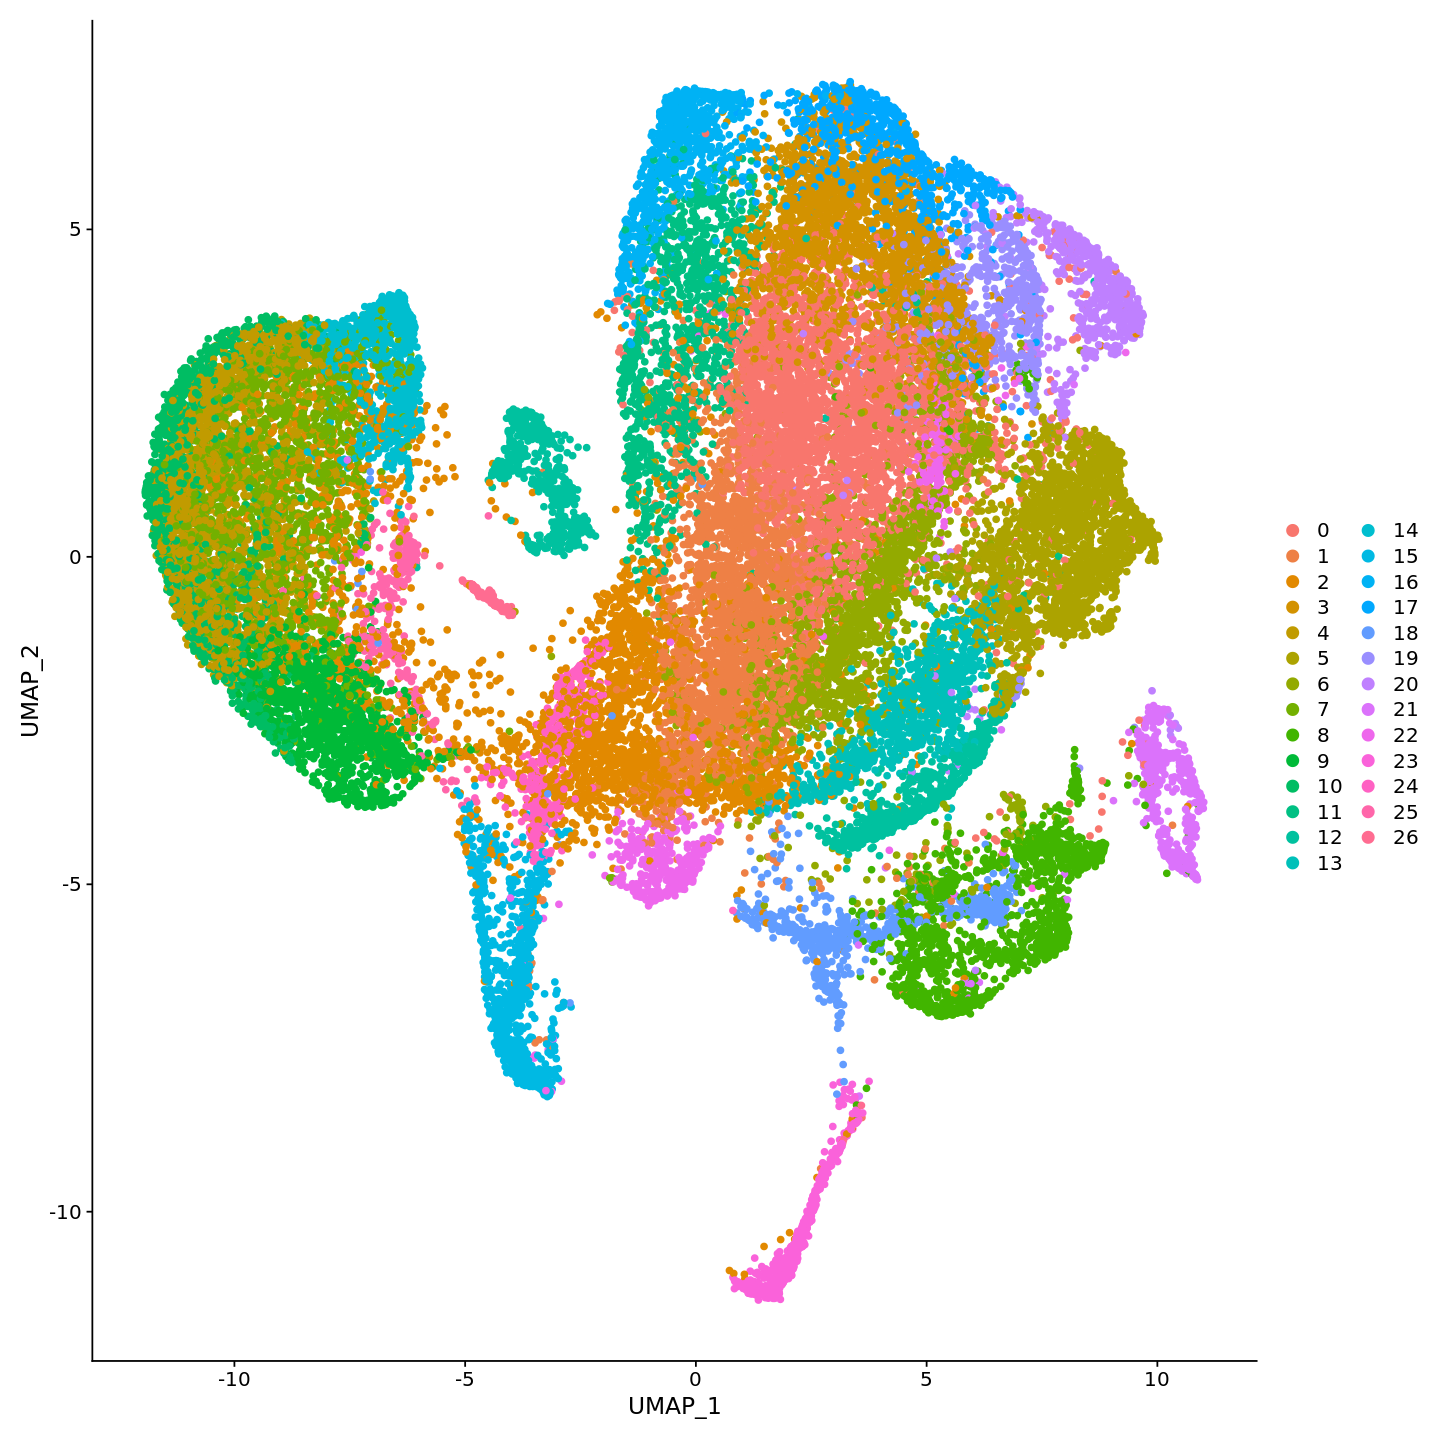

In [86]:
all_intd_sct <- FindClusters(all_intd_sct, resolution = 0.7)
DimPlot(all_intd_sct, reduction = "umap", label = FALSE, pt.size = 1.5)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 35956
Number of edges: 1189688

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8966
Number of communities: 27
Elapsed time: 11 seconds


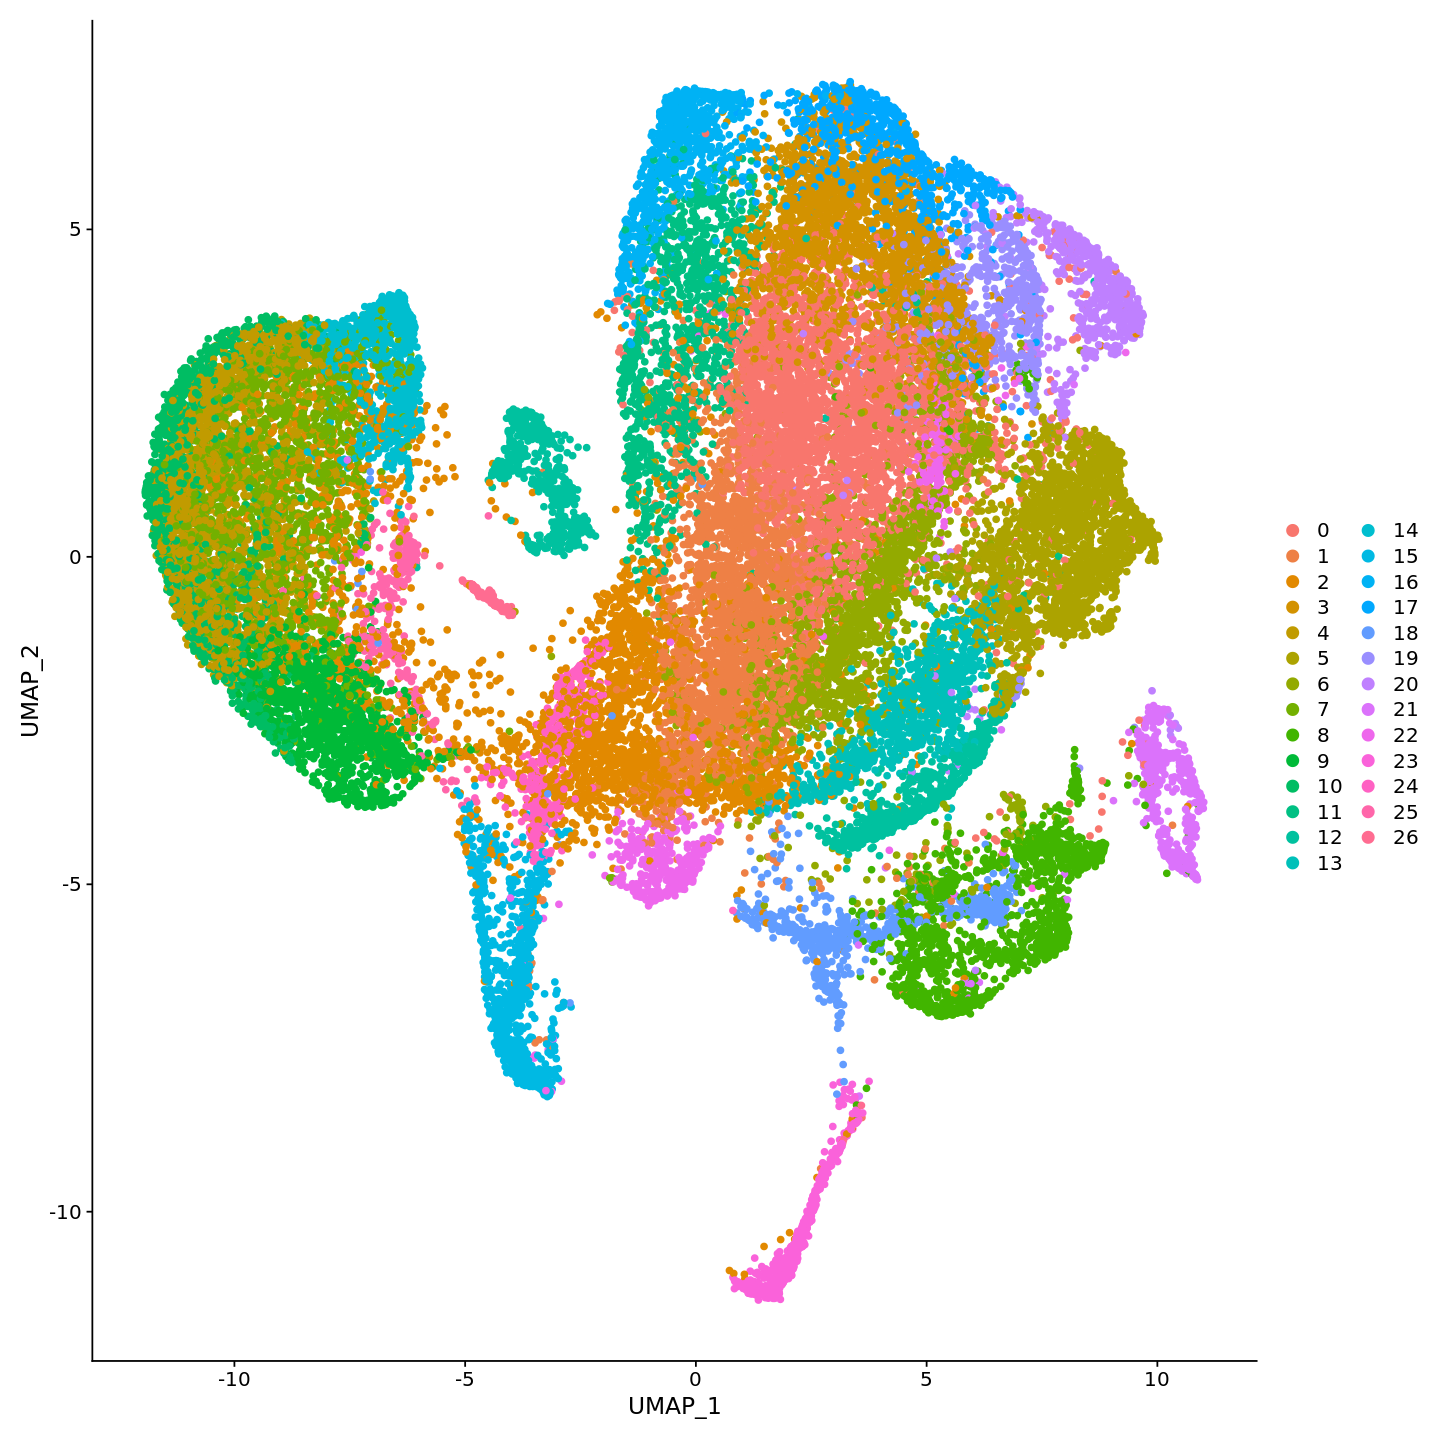

In [15]:
all_intd_sct <- FindClusters(all_intd_sct, resolution = 0.7)
DimPlot(all_intd_sct, reduction = "umap", label = FALSE, pt.size = 1.5)

In [ ]:
# genes = c("AT2G30130", "AT3G07340","AT5G48560","AT1G68320","AT3G54340","AT4G37540","AT2G37430","AT4G23550","AT4G18170","AT4G05100",
# "AT3G28910","AT5G13330","AT1G52890","AT1G22190","AT1G62300","AT5G18270","AT4G38620","AT3G09735")


options(repr.plot.width=8, repr.plot.height=8)
# all_intd_sct@active.assay = "RNA"
# FeaturePlot(all_intd_sct, features = c(genes[10]),  pt.size = 1.5, order = TRUE, min = 1)#, slot = "data")
# FeaturePlot(all_intd_sct, features = c(genes[12]),  pt.size = 1.5, order = TRUE, min = 1)#,#, slot = "data")
# FeaturePlot(all_intd_sct, features = c(genes[13]),  pt.size = 1.5, order = TRUE, min = 1)#, slot = "data")
# FeaturePlot(all_intd_sct, features = c(genes[14]),  pt.size = 1.5, order = TRUE, min = 1)#,#, slot = "data")
# FeaturePlot(all_intd_sct, features = c(genes[15]),  pt.size = 1.5, order = TRUE, min = 1)#,#, slot = "data")
# FeaturePlot(all_intd_sct, features = c(genes[16]),  pt.size = 1.5, order = TRUE, min = 1)#,#, slot = "data")
# FeaturePlot(all_intd_sct, features = c(genes[17]),  pt.size = 1.5, order = TRUE, min = 1)#,#, slot = "data")
# FeaturePlot(all_intd_sct, features = c(genes[18]),  pt.size = 1.5, order = TRUE, min = 1)#,#, slot = "data")
# FeaturePlot(all_intd_sct, features = c(genes[11]),  pt.size = 1.5, order = TRUE, min = 1)#,#, slot = "data")

# #Dev Cell SAM paper below

# #vascular subtype 1
# #ast68
# FeaturePlot(all_intd_sct, features = c("AT5G10180"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")
# #gdu4
# FeaturePlot(all_intd_sct, features = c("AT2G24762"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")


# #divsion
# #CYCA1;1
# FeaturePlot(all_intd_sct, features = c("AT1G44110"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")

# #meristem
# #knat2
# FeaturePlot(all_intd_sct, features = c("AT1G70510"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")
# #knat6
# FeaturePlot(all_intd_sct, features = c("AT1G23380"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")


#guard cells
#fama
FeaturePlot(all_intd_sct, features = c("AT3G24140"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")
#epf1
FeaturePlot(all_intd_sct, features = c("AT2G20875"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")
#myb60
FeaturePlot(all_intd_sct, features = c("AT1G08810"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")
#almt12
FeaturePlot(all_intd_sct, features = c("AT4G17970"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")
#scap1
FeaturePlot(all_intd_sct, features = c("AT5G65590"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")

#epidermis
# atml1
FeaturePlot(all_intd_sct, features = c("AT4G21750"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")
# pdf1
FeaturePlot(all_intd_sct, features = c("AT2G42840"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")
#fiddlehead
FeaturePlot(all_intd_sct, features = c("AT2G26250"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")
#dcr
FeaturePlot(all_intd_sct, features = c("AT5G23940"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")
# eda17
FeaturePlot(all_intd_sct, features = c("AT1G72970"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")




#mesophyll
#rbcs2b
FeaturePlot(all_intd_sct, features = c("AT5G38420"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")
#stomagen
FeaturePlot(all_intd_sct, features = c("AT4G12970"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")
#pnsl1
FeaturePlot(all_intd_sct, features = c("AT2G39470"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")
#ESM1
FeaturePlot(all_intd_sct, features = c("AT3G14210"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")
#ger1
FeaturePlot(all_intd_sct, features = c("AT5G20630"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")

#phloem
#cle25
FeaturePlot(all_intd_sct, features = c("AT3G28455"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")
#smxl5
FeaturePlot(all_intd_sct, features = c("AT5G57130"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")
#obp2
FeaturePlot(all_intd_sct, features = c("AT1G07640"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")
#faf3
FeaturePlot(all_intd_sct, features = c("AT5G19260"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")
#cyp79b3
FeaturePlot(all_intd_sct, features = c("AT2G22330"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")

#xylem
#pxy
FeaturePlot(all_intd_sct, features = c("AT5G61480"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")


#comapnion cells
#suc2
FeaturePlot(all_intd_sct, features = c("AT1G22710"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")
#pp2-a1
FeaturePlot(all_intd_sct, features = c("AT4G19840"),  pt.size = 1.5, order = TRUE,  min = 1)#, slot = "data")

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



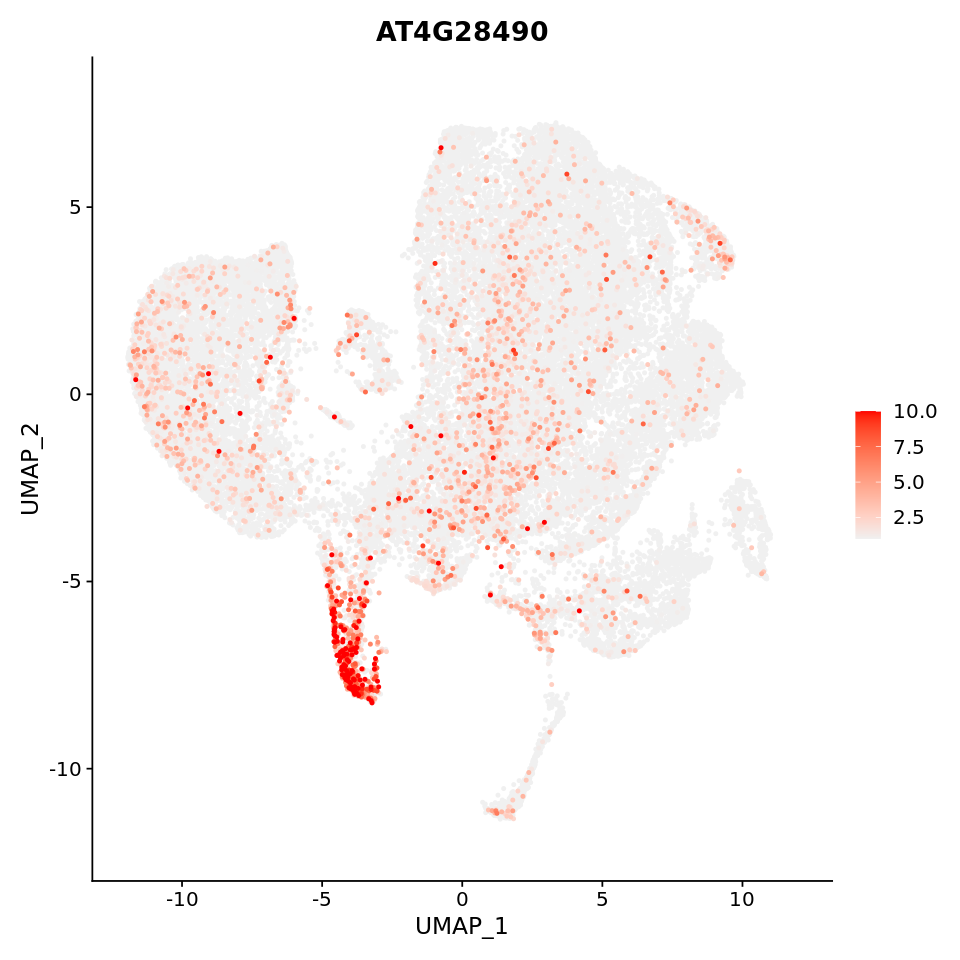

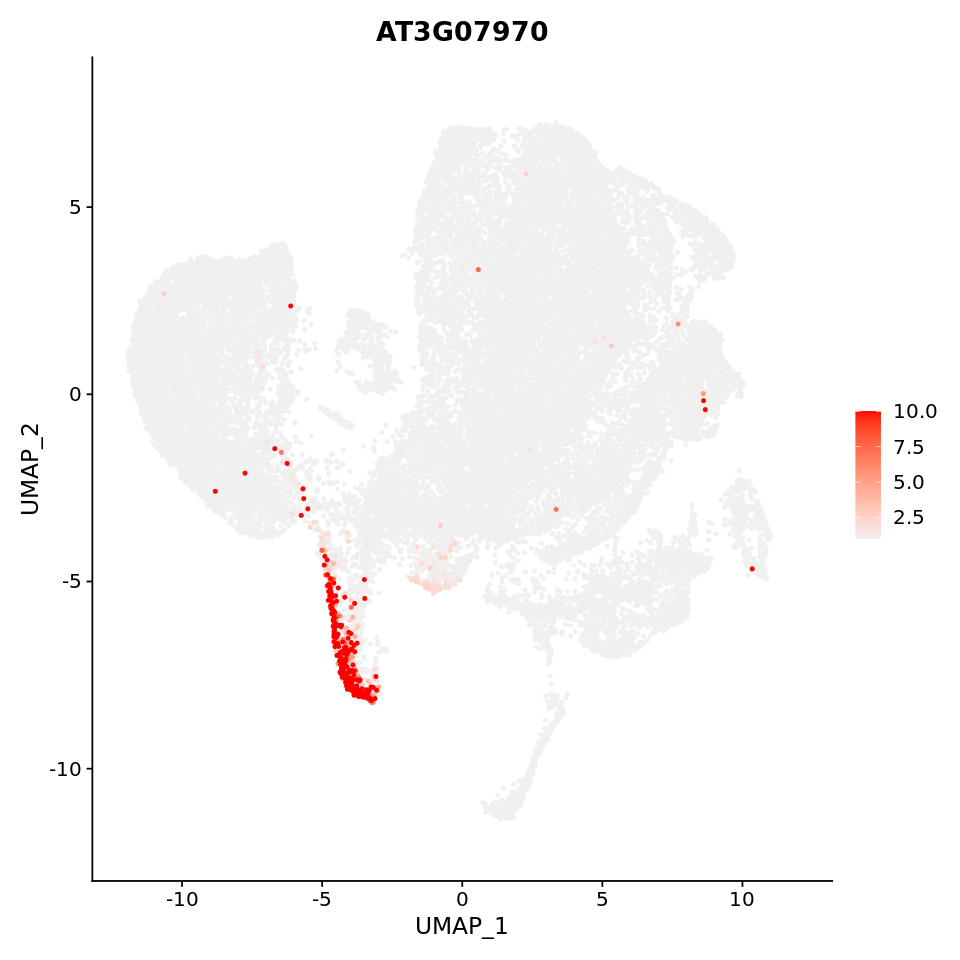

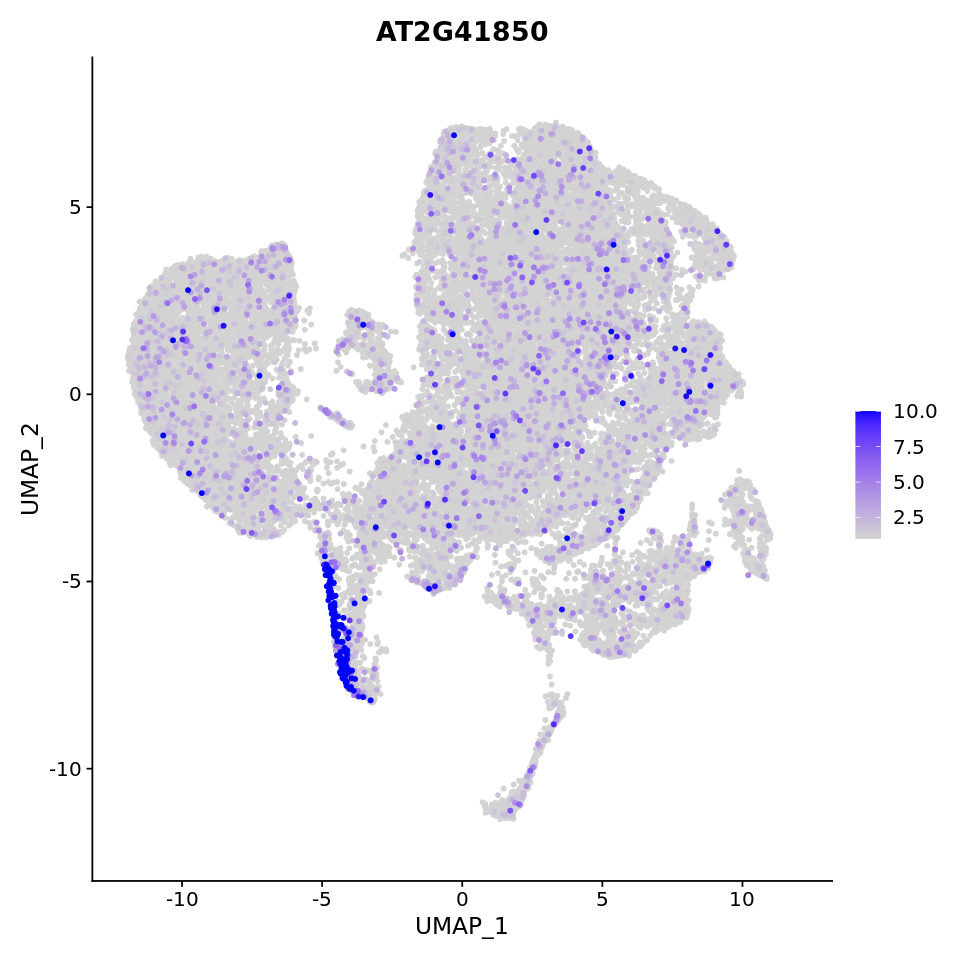

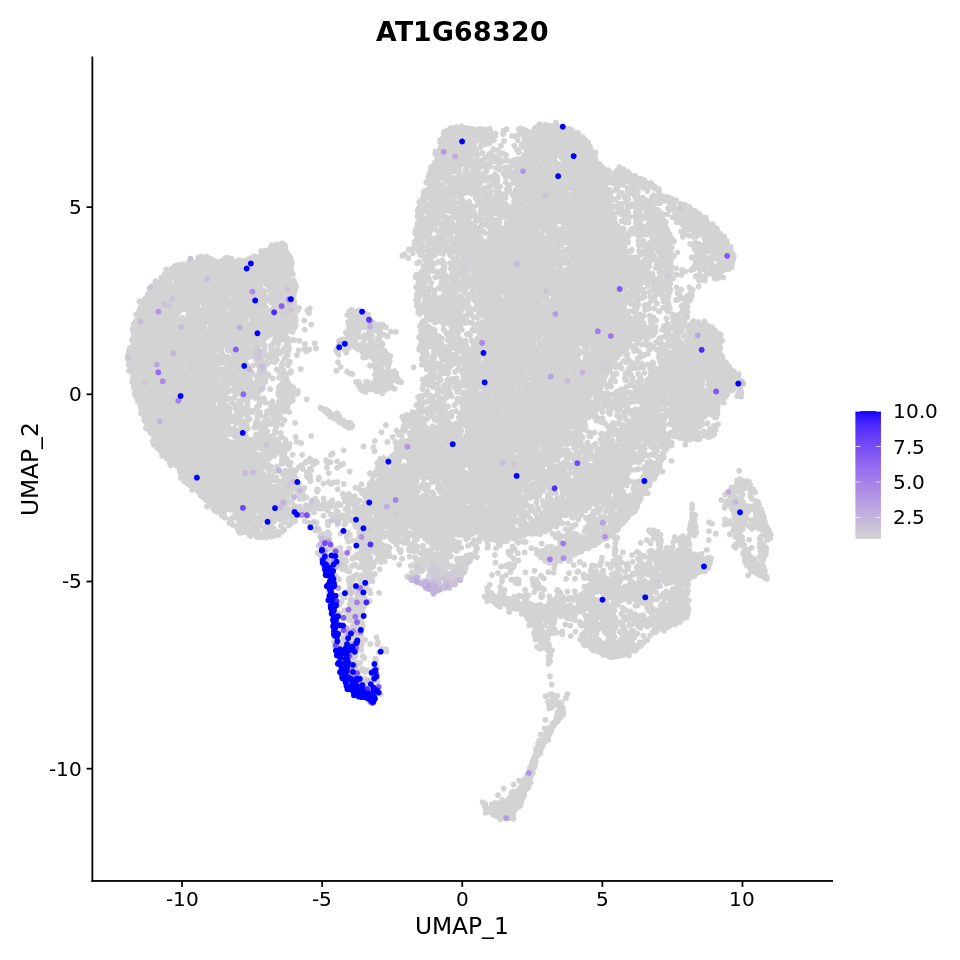

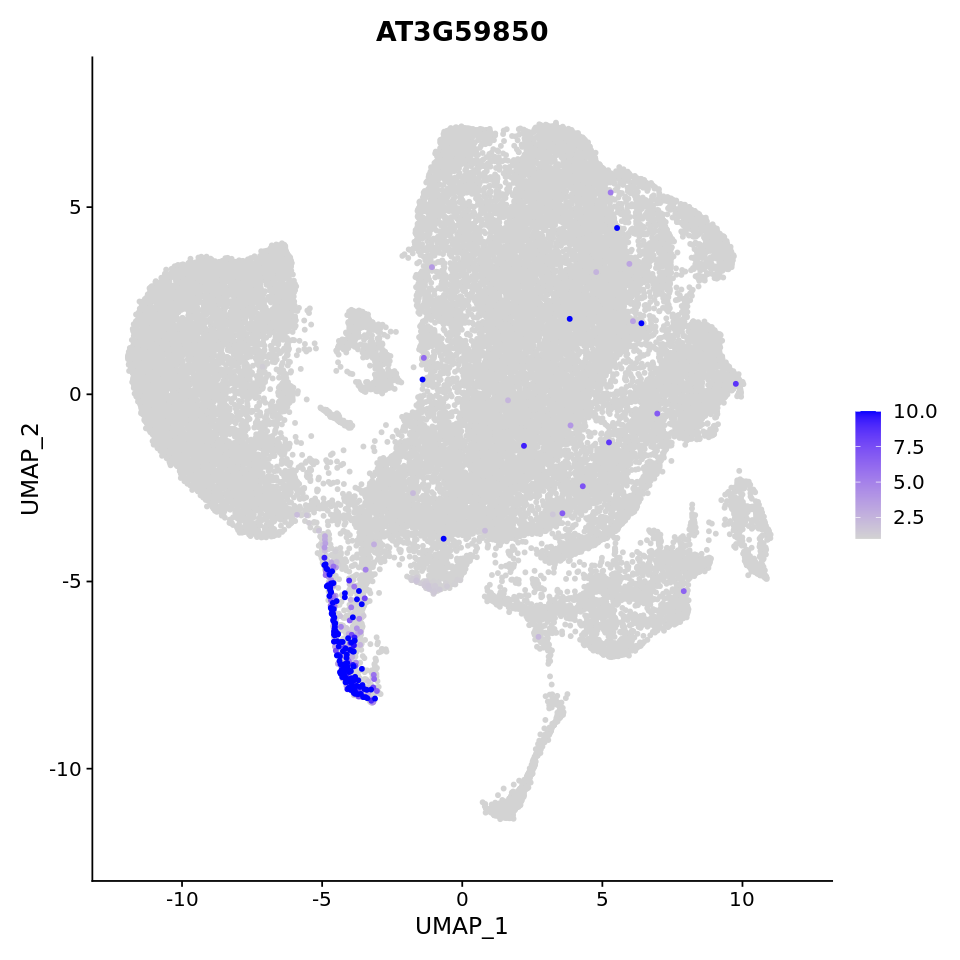

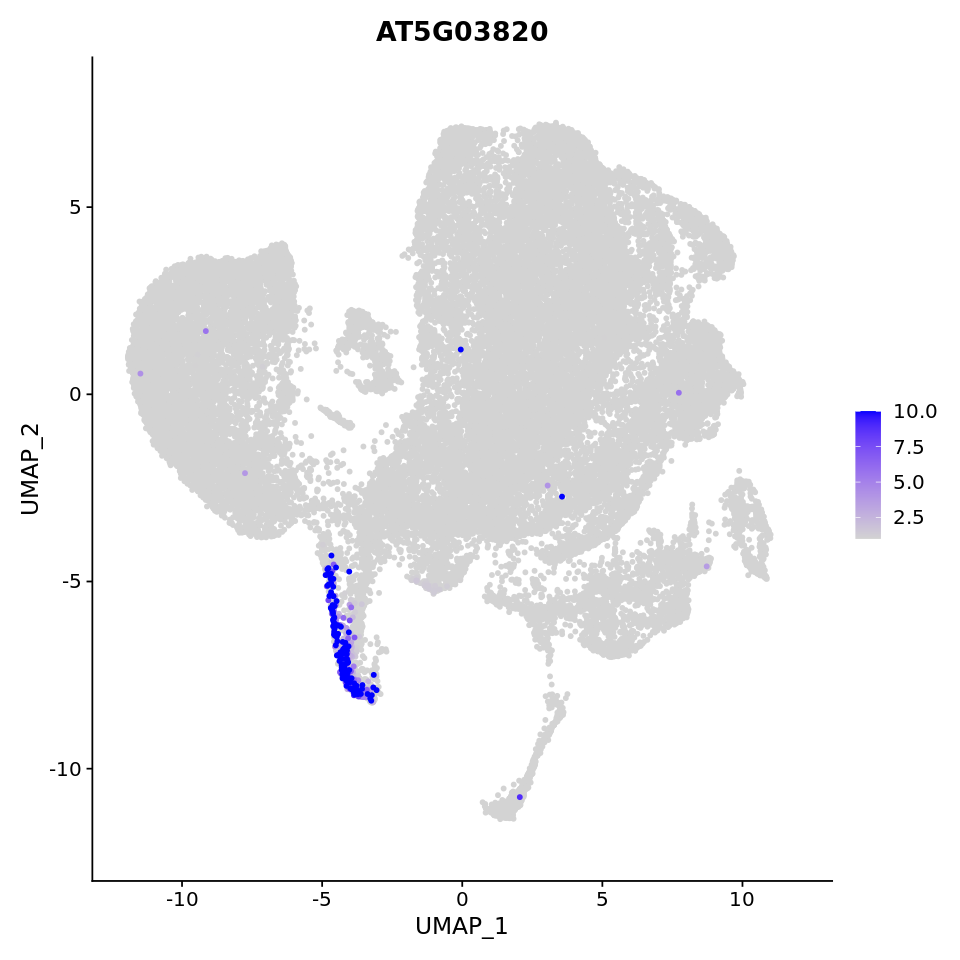

In [81]:
options(repr.plot.width=8, repr.plot.height=8)
#haesa
FeaturePlot(all_intd_sct, features = c("AT4G28490"),  pt.size = .75, order = TRUE,  min = 1) + scale_colour_gradient(low = "gray94", high = "red", space = "Lab", na.value = "grey50", guide = "colourbar",aesthetics = "colour")

#qrt2
FeaturePlot(all_intd_sct, features = c("AT3G07970"),   pt.size = .75, order = TRUE,  min = 1) + scale_colour_gradient(low = "gray94", high = "red", space = "Lab", na.value = "grey50", guide = "colourbar",aesthetics = "colour")


#pgazat
FeaturePlot(all_intd_sct, features = c("AT2G41850"),  pt.size = 1, order = TRUE,  min = 1)#, split.by = "geno")#, slot = "data")

#myb62
FeaturePlot(all_intd_sct, features = c("AT1G68320"),  pt.size = 1, order = TRUE,  min = 1)#, split.by = "geno")#, slot = "data")

#ppg
FeaturePlot(all_intd_sct, features = c("AT3G59850"),  pt.size = 1, order = TRUE,  min = 1)#, split.by = "geno")#, slot = "data")

#gdsl
FeaturePlot(all_intd_sct, features = c("AT5G03820"),  pt.size = 1, order = TRUE,  min = 1)#, split.by = "geno")#, slot = "data")


In [54]:
all_intd_sct@assays

$RNA
Assay data with 24363 features for 35956 cells
First 10 features:
 AT1G01010, AT1G01040, AT1G01110, AT1G01160, AT1G01180, AT1G01210,
AT1G01220, AT1G01225, AT1G01230, AT1G01240 

$spliced
Assay data with 32901 features for 35956 cells
First 10 features:
 AT1G01010, AT1G03987, AT1G01040, AT1G01046, AT1G03997, AT1G01110,
AT1G01160, AT1G04013, AT1G01180, AT1G01210 

$unspliced
Assay data with 32901 features for 35956 cells
First 10 features:
 AT1G01010, AT1G03987, AT1G01040, AT1G01046, AT1G03997, AT1G01110,
AT1G01160, AT1G04013, AT1G01180, AT1G01210 

$SCT
Assay data with 22853 features for 35956 cells
First 10 features:
 AT1G01010, AT1G01040, AT1G01110, AT1G01160, AT1G01180, AT1G01210,
AT1G01220, AT1G01225, AT1G01230, AT1G01240 

$integrated
Assay data with 20426 features for 35956 cells
Top 10 variable features:
 AT2G38530, AT5G45890, AT5G59320, AT1G52400, AT2G38540, AT3G08770,
AT5G52390, AT2G22860, AT1G09310, AT1G62480 


In [ ]:
all_intd_sct@meta.data

In [ ]:
#AZ.markers=FindMarkers(all_intd_sct,10,thresh.use = 2)

In [160]:
#write.csv(AZ.markers, "../data/markers/AZ_markers_10_7_20.csv")

In [142]:
#AZ.markers = AZ.markers[!(rownames(AZ.markers) %in% proto_list),]

In [161]:
#write.csv(AZ.markers[(AZ.markers$p_val_adj < .1) & (AZ.markers$avg_logFC > 2),],  "../data/markers/AZ_markers_no_proto_highAZ_10_7_20.csv")

In [10]:
all_intd_sct = NormalizeData(all_intd_sct, verbose = FALSE)

In [34]:
table(Idents(all_intd_sct), all_intd_sct$orig.ident)

    
     sc_26_combined sc_27_combined sc_67 sc_68
  0             744           2578   763   831
  1             948           1600   939   683
  2             594           1795   645   604
  3             508           1136   730   905
  4             767            955   784   658
  5             625           1561   350   429
  6             466           1003   537   618
  7             520            997   514   506
  8             434           1040   482   516
  9             450            836   359   389
  10            424            614   293   280
  11            158            427   215   250
  12            339            257   195   122
  13            179            299   217   214
  14             89            209   105    93

In [35]:
cluster = "12"
all_intd_sct@active.assay = "RNA"

wt_1_AZ <- rowSums(as.matrix(GetAssayData(subset(all_intd_sct, subset = orig.ident == "sc_26_combined"), slot = "counts")[, WhichCells(subset(all_intd_sct, subset = orig.ident == "sc_26_combined"), ident = cluster)]))
wt_2_AZ <- rowSums(as.matrix(GetAssayData(subset(all_intd_sct, subset = orig.ident == "sc_67"), slot = "counts")[, WhichCells(subset(all_intd_sct, subset = orig.ident == "sc_67"), ident = cluster)]))
mut_1_AZ <- rowSums(as.matrix(GetAssayData(subset(all_intd_sct, subset = orig.ident == "sc_27_combined"), slot = "counts")[, WhichCells(subset(all_intd_sct, subset = orig.ident == "sc_27_combined"), ident = cluster)]))
mut_2_AZ <- rowSums(as.matrix(GetAssayData(subset(all_intd_sct, subset = orig.ident == "sc_68"), slot = "counts")[, WhichCells(subset(all_intd_sct, subset = orig.ident == "sc_68"), ident = cluster)]))

wt_1_all <- rowSums(as.matrix(GetAssayData(subset(all_intd_sct, subset = orig.ident == "sc_26_combined"), slot = "counts")))
wt_2_all <- rowSums(as.matrix(GetAssayData(subset(all_intd_sct, subset = orig.ident == "sc_67"), slot = "counts")))
mut_1_all <- rowSums(as.matrix(GetAssayData(subset(all_intd_sct, subset = orig.ident == "sc_27_combined"), slot = "counts")))
mut_2_all <- rowSums(as.matrix(GetAssayData(subset(all_intd_sct, subset = orig.ident == "sc_68"), slot = "counts")))


In [36]:
head(wt_1_all)
head(wt_1_AZ)

AT1G01010 AT1G01040 AT1G01110 AT1G01160 AT1G01180 AT1G01210 
     1682       693       173      1248       145       310

AT1G01010 AT1G01040 AT1G01110 AT1G01160 AT1G01180 AT1G01210 
       65        44         0       119         0        23

In [37]:
all_AZ = cbind (wt_1_AZ, wt_2_AZ, mut_1_AZ, mut_2_AZ)
colnames(all_AZ) = c("wt_1_pb", "wt_2_pb", "mut_1_pb", "mut_2_pb")

all_all = cbind (wt_1_all, wt_2_all, mut_1_all, mut_2_all)
colnames(all_AZ) = c("wt_1_pb", "wt_2_pb", "mut_1_pb", "mut_2_pb")

In [38]:
all_AZ_bad_norm = all_AZ
all_AZ_bad_norm[,1] = all_AZ[,1]/colSums(all_AZ)[1] 
all_AZ_bad_norm[,2] = all_AZ[,2]/colSums(all_AZ)[2] 
all_AZ_bad_norm[,3] = all_AZ[,3]/colSums(all_AZ)[3] 
all_AZ_bad_norm[,4] = all_AZ[,4]/colSums(all_AZ)[4] 
all_AZ_bad_norm = all_AZ_bad_norm * 1000000

all_all_bad_norm = all_all
all_all_bad_norm[,1] = all_all[,1]/colSums(all_all)[1] 
all_all_bad_norm[,2] = all_all[,2]/colSums(all_all)[2] 
all_all_bad_norm[,3] = all_all[,3]/colSums(all_all)[3] 
all_all_bad_norm[,4] = all_all[,4]/colSums(all_all)[4] 
all_all_bad_norm = all_all_bad_norm * 1000000

all_nAZ_bad_norm = all_all - all_AZ
all_nAZ_bad_norm[,1] = (all_all - all_AZ)[,1]/colSums(all_all - all_AZ)[1] 
all_nAZ_bad_norm[,2] = (all_all - all_AZ)[,2]/colSums(all_all - all_AZ)[2] 
all_nAZ_bad_norm[,3] = (all_all - all_AZ)[,3]/colSums(all_all - all_AZ)[3] 
all_nAZ_bad_norm[,4] = (all_all - all_AZ)[,4]/colSums(all_all - all_AZ)[4] 
all_nAZ_bad_norm = all_nAZ_bad_norm * 1000000

In [ ]:
all_AZ_bad_norm[c("AT1G61820","AT4G23500","AT1G71380","AT4G30290","AT3G59850","AT4G25810","AT3G60140","AT1G22880","AT3G07970",
"AT4G18340","AT2G41850"),]

all_AZ_bad_norm[c("AT4G23500","AT1G71380","AT4G30290","AT1G22880","AT4G18340"),]

all_AZ_bad_norm[c("AT4G28490", "AT5G65710","AT1G68765", "AT1G71830","AT2G41850", "AT3G07970", "AT5G03280","AT4G08150", "AT3G45640","AT2G43790"),]

In [40]:
all_AZ_bad_norm[c("AT4G28490", "AT5G65710", "AT2G41850", "AT3G07970"),]

all_nAZ_bad_norm[c("AT4G28490", "AT5G65710", "AT2G41850", "AT3G07970"),]

all_all_bad_norm[c("AT4G28490", "AT5G65710", "AT2G41850", "AT3G07970"),]

,wt_1_pb,wt_2_pb,mut_1_pb,mut_2_pb
AT4G28490,534.16330,416.08667,363.194134,384.209199
AT5G65710,38.53863,11.48504,7.592909,7.881214
AT2G41850,783.02126,999.52682,275.875684,200.970966
AT3G07970,449.31857,385.89742,29.106150,55.168500


,wt_1_all,wt_2_all,mut_1_all,mut_2_all
AT4G28490,40.5877930,28.1380934,47.4276902,37.8737045
AT5G65710,1.5789765,0.9223641,1.4147135,0.9246632
AT2G41850,63.3614924,13.5359921,51.4862945,13.8324615
AT3G07970,0.4251091,0.2395751,0.1391521,0.0000000


,wt_1_all,wt_2_all,mut_1_all,mut_2_all
AT4G28490,71.91015,41.80122,53.1104674,40.0562844
AT5G65710,3.92444,1.29437,1.5259011,0.9685028
AT2G41850,109.03118,48.26151,55.5245795,15.0117941
AT3G07970,28.91194,13.82202,0.6604646,0.3476677


In [41]:
write.csv(all_AZ, file = "../data/counts/flowers_3_22_21.csv")

In [ ]:
options(repr.plot.width=15, repr.plot.height=8)
all_intd_sct@active.assay = "RNA"
FeaturePlot(all_intd_sct, features = c("AT4G28490"),  pt.size = 1, order = TRUE, min = 0, split.by = "geno")#, slot = "data")
FeaturePlot(all_intd_sct, features = c("AT5G65710"),  pt.size = 1, order = TRUE,  min = 0, split.by = "geno")#, slot = "data")
FeaturePlot(all_intd_sct, features = c("AT2G41850"),  pt.size = 1, order = TRUE,  min = 1, split.by = "geno")#, slot = "data")
FeaturePlot(all_intd_sct, features = c("AT3G07970"),  pt.size = 1, order = TRUE,  min = 1, split.by = "geno")#, slot = "data")
#"AT5G65710","AT1G68765", "AT1G71830",, "AT3G07970", "AT5G03280","AT1G29290", "AT1G71830"

In [ ]:
options(repr.plot.width=17, repr.plot.height=6)
all_intd_sct@active.assay = "RNA"
FeaturePlot(all_intd_sct, features = c("AT4G28490"),  pt.size = 1, order = TRUE, min = 1, split.by = "orig.ident")#, slot = "data")
FeaturePlot(all_intd_sct, features = c("AT5G65710"),  pt.size = 1, order = TRUE, min = 1, split.by = "orig.ident")#, slot = "data")
FeaturePlot(all_intd_sct, features = c("AT2G41850"),  pt.size = 1, order = TRUE, min = 1, split.by = "orig.ident")#, slot = "data")
FeaturePlot(all_intd_sct, features = c("AT3G07970"), pt.size = 1, order = TRUE, min = 1, split.by = "orig.ident")#, slot = "data")
#"AT5G65710","AT1G68765", "AT1G71830",, "AT3G07970", "AT5G03280","AT1G29290", "AT1G71830"

In [7]:
#takes a list of Seurat objects with SCT transform run
seu_integrate <- function(..., filename, nfeatures){
    seu.list <- list(...) # THIS WILL BE A LIST STORING EVERYTHING:
    
    ref.genes = rownames(seu.list[[1]]@assays$RNA)
    assay_list <- rep("SCT", length(seu.list))

    for (i in 1:length(seu.list)) {
        seu.list[[i]]@assays$spliced_RNA <- NULL
        seu.list[[i]]@assays$spliced_SCT <- NULL
        seu.list[[i]]@assays$unspliced_RNA <- NULL
        seu.list[[i]]@assays$unspliced_SCT <- NULL
        

    # integration
    rc.features <- SelectIntegrationFeatures(object.list = seu.list, nfeatures = nfeatures)
    rc.features <- rc.features[(!c(grepl("ATMG",rc.features) | grepl("ATCG",rc.features) | rc.features%in%proto_list))]
    
    seu.list <- PrepSCTIntegration(object.list = seu.list, anchor.features = rc.features, verbose = TRUE, assay = assay_list)
    seu.list <- lapply(X = seu.list, FUN = RunPCA, verbose = FALSE, features = rc.features)
    rc.anchors <- FindIntegrationAnchors(object.list = seu.list, normalization.method = "SCT", anchor.features = rc.features, verbose = TRUE, reference=1, reduction = "rpca")
    
    to_integrate <- Reduce(intersect, lapply(rc.anchors@object.list, rownames))
    # integrate data and keep full geneset
       
    rc.integrated <- IntegrateData(anchorset = rc.anchors,  features.to.integrate = to_integrate, normalization.method = "SCT", verbose = TRUE)
   # rc.integrated <- RunPCA(rc.integrated, npcs = 50, verbose = FALSE, approx = FALSE)
    
    #save object    
    saveRDS(rc.integrated, file = paste("../data/intd_seu_objects/",filename,".rds", sep = ""))
    return(rc.integrated)
    }
}